# Ejemplo completo
  - **Problema**: Un equipo de marketing quiere predecir qué clientes tienen mayor probabilidad de abandonar un servicio (*churn rate*).  
  - **Uso de Pandas**:  

Accuracy: 0.5333333333333333
              precision    recall  f1-score   support

           0       0.62      0.68      0.65        19
           1       0.33      0.27      0.30        11

    accuracy                           0.53        30
   macro avg       0.48      0.48      0.48        30
weighted avg       0.51      0.53      0.52        30



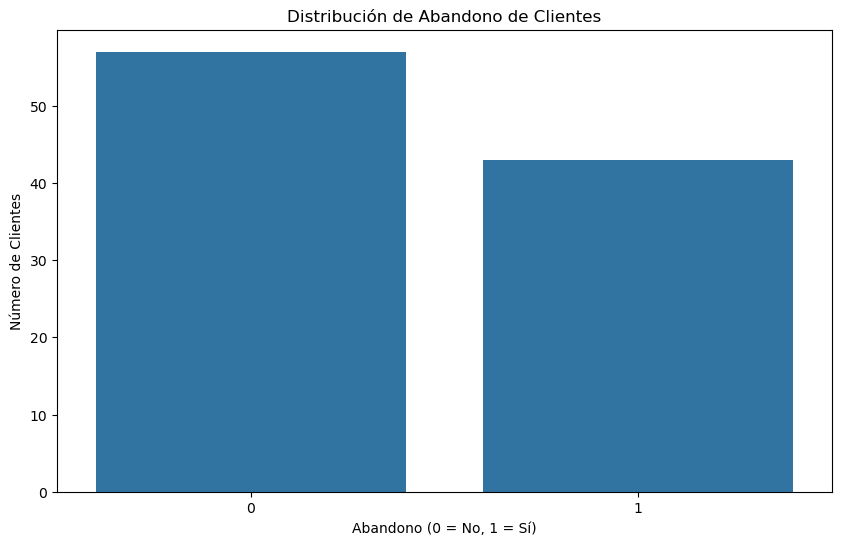

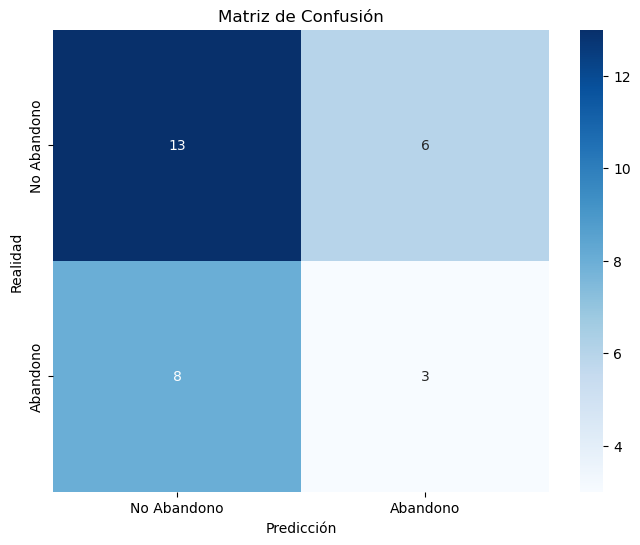

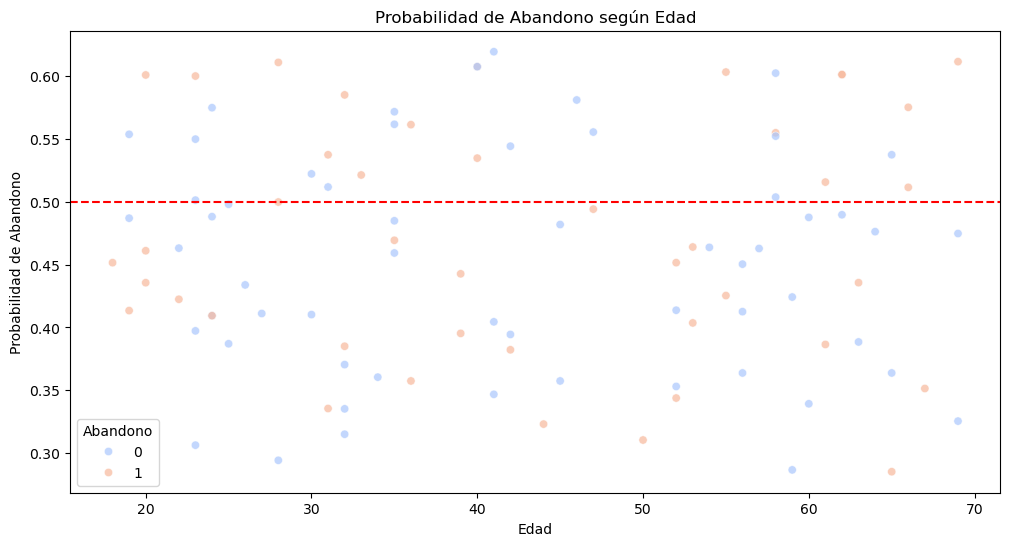

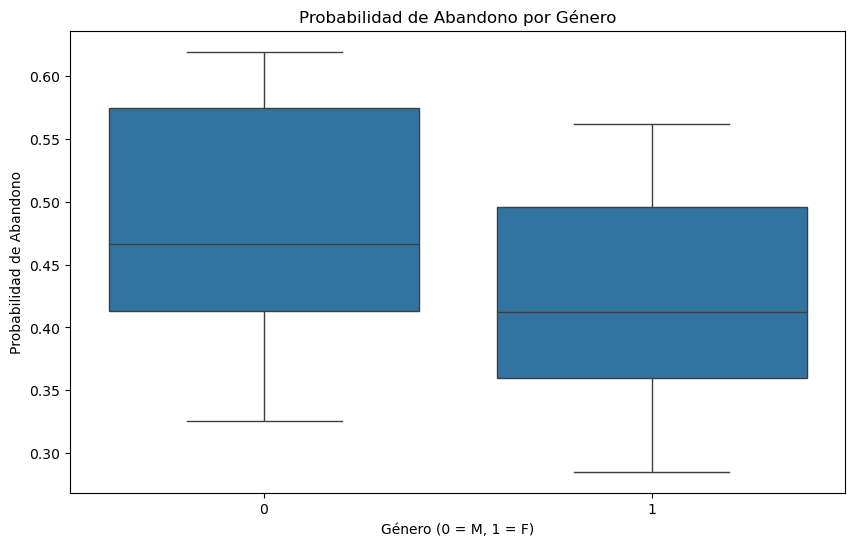

<module 'matplotlib.pyplot' from 'C:\\Users\\alber\\anaconda3\\envs\\ambiente_1\\Lib\\site-packages\\matplotlib\\pyplot.py'>

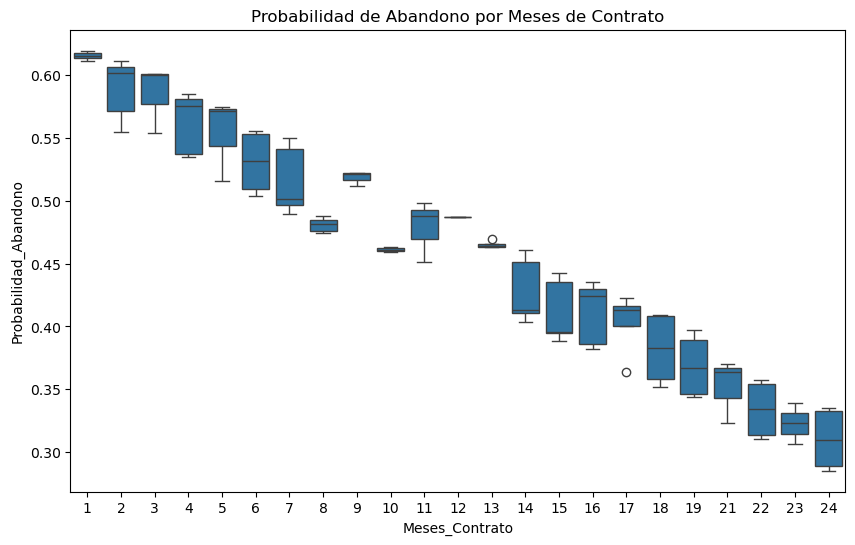

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Configuración de la semilla para reproducibilidad
random.seed(42)

# Generar datos ficticios
clientes = {
    "Edad": [random.randint(18, 70) for _ in range(100)],
    "Genero": [random.choice(["M", "F"]) for _ in range(100)],
    "Meses_Contrato": [random.randint(1, 24) for _ in range(100)],
    "Abandono": [random.choice([0, 1]) for _ in range(100)]
}

# Crear un DataFrame
datos = pd.DataFrame(clientes)

# Transformar la columna "Genero" de categorías a números
datos["Genero"] = datos["Genero"].map({"M": 0, "F": 1})

# Dividir datos para entrenamiento
X = datos[["Edad", "Genero", "Meses_Contrato"]]
y = datos["Abandono"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones y obtener probabilidades
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidades de abandono

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualización de resultados
plt.figure(figsize=(10, 6))
sns.countplot(x='Abandono', data=datos)
plt.title('Distribución de Abandono de Clientes')
plt.xlabel('Abandono (0 = No, 1 = Sí)')
plt.ylabel('Número de Clientes')
plt.show()

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Abandono', 'Abandono'], yticklabels=['No Abandono', 'Abandono'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Visualización de la probabilidad de abandono
datos['Probabilidad_Abandono'] = modelo.predict_proba(X)[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Edad', y='Probabilidad_Abandono', hue='Abandono', data=datos, palette='coolwarm', alpha=0.7)
plt.title('Probabilidad de Abandono según Edad')
plt.xlabel('Edad')
plt.ylabel('Probabilidad de Abandono')
plt.axhline(0.5, color='red', linestyle='--')  # Línea de referencia
plt.show()

# Boxplot de probabilidad de abandono por género
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genero', y='Probabilidad_Abandono', data=datos)
plt.title('Probabilidad de Abandono por Género')
plt.xlabel('Género (0 = M, 1 = F)')
plt.ylabel('Probabilidad de Abandono')
plt.show()

# Boxplot de probabilidad de abandono por meses de contrato
plt.figure(figsize=(10, 6))
sns.boxplot(x='Meses_Contrato', y='Probabilidad_Abandono', data=datos)
plt.title('Probabilidad de Abandono por Meses de Contrato')
plt